In [1]:
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
print(X_train.shape,Y_train.shape)
np.unique(Y_train)

(60000, 28, 28) (60000,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

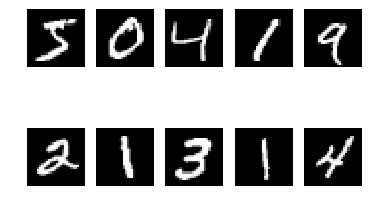

In [3]:
#显示实例图像
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i,:,:],cmap='gray')
    plt.axis('off')

In [4]:
#预处理训练数据
img_rows,img_cols=28,28
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0
X_train=np.reshape(X_train,(X_train.shape[0],img_rows,img_cols,1))
X_test=np.reshape(X_test,(X_test.shape[0],img_rows,img_cols,1))

In [5]:
#添加噪音
noise_facter=0.5
X_train_noise=X_train+noise_facter*np.random.normal(loc=0.0,scale=1.0,size=X_train.shape) #添加高斯白噪音变化范围为noise_facter*(0-1) 
X_test_noise=X_test+noise_facter*np.random.normal(loc=0.0,scale=1.0,size=X_test.shape)
X_train_noise=np.clip(X_train_noise,0.0,1.0) #将值限制在0 1范围内，超过了这个范围就强制设置为边界值
X_test_noise=np.clip(X_test_noise,0.0,1.0)

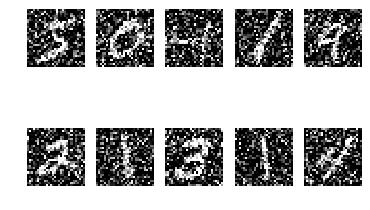

In [6]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train_noise[i].reshape(28,28),cmap='gray')
    plt.axis('off')

In [9]:
#构建网络
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model,load_model
input_img=Input(shape=(28,28,1))
x=Conv2D(32,(3,3),padding='same',activation='relu')(input_img)#outputSize=28x28x32
x=MaxPooling2D(padding='same')(x)#outsiez=14x14x32
x=Conv2D(32,(3,3),padding='same',activation='relu')(x)#outsize=14x14x32
encoder=MaxPooling2D(padding='same')(x)#outsize=7x7x32

x=Conv2D(32,(3,3),padding='same',activation='relu')(encoder)
x=UpSampling2D()(x)
x=Conv2D(32,(3,3),padding='same',activation='relu')(x)#14x14x32
x=UpSampling2D()(x)#outsiz=28x28x32
decoder=Conv2D(1,(3,3),padding='same',activation='sigmoid')(x)#outsize=28x28x1

autoencoder=Model(input_img,decoder)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
autoencoder.fit(X_train_noise, X_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noise, X_test))

autoencoder.save('autoencoder.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 55s 915us/step - loss: 0.1786 - val_loss: 0.1216
Epoch 2/100
60000/60000 [==============================] - 54s 905us/step - loss: 0.1188 - val_loss: 0.1121
Epoch 3/100
60000/60000 [==============================] - 55s 910us/step - loss: 0.1114 - val_loss: 0.1097
Epoch 4/100
60000/60000 [==============================] - 54s 893us/step - loss: 0.1081 - val_loss: 0.1056
Epoch 5/100
60000/60000 [==============================] - 53s 884us/step - loss: 0.1059 - val_loss: 0.1038
Epoch 6/100
60000/60000 [==============================] - 54s 902us/step - loss: 0.1045 - val_loss: 0.1014
Epoch 7/100
60000/60000 [==============================] - 55s 915us/step - loss: 0.1032 - val_loss: 0.1010
Epoch 8/100
60000/60000 [==============================] - 55s 910us/step - loss: 0.1022 - val_loss: 0.1027
Epoch 9/100
60000/60000 [==============================] - 53s 880us/step - loss: 0.10

Epoch 76/100
60000/60000 [==============================] - 52s 867us/step - loss: 0.0945 - val_loss: 0.0944
Epoch 77/100
60000/60000 [==============================] - 52s 871us/step - loss: 0.0946 - val_loss: 0.0944
Epoch 78/100
60000/60000 [==============================] - 52s 874us/step - loss: 0.0945 - val_loss: 0.0939
Epoch 79/100
60000/60000 [==============================] - 54s 906us/step - loss: 0.0945 - val_loss: 0.0939
Epoch 80/100
60000/60000 [==============================] - 52s 868us/step - loss: 0.0945 - val_loss: 0.0939
Epoch 81/100
60000/60000 [==============================] - 53s 891us/step - loss: 0.0943 - val_loss: 0.0939
Epoch 82/100
60000/60000 [==============================] - 53s 882us/step - loss: 0.0944 - val_loss: 0.0944
Epoch 83/100
60000/60000 [==============================] - 52s 871us/step - loss: 0.0944 - val_loss: 0.0941
Epoch 84/100
60000/60000 [==============================] - 54s 904us/step - loss: 0.0944 - val_loss: 0.0939
Epoch 85/100
60000/

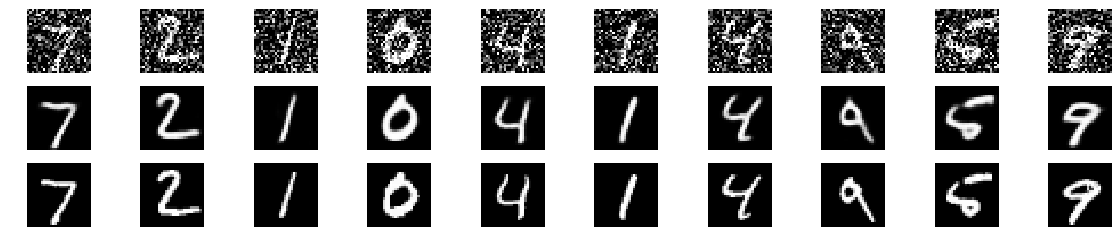

In [13]:
del autoencoder
autoencoder=load_model('autoencoder.h5')
decode_imgs=autoencoder.predict(X_test_noise)
plt.figure(figsize=(20,4))
for i in range(10):    
    plt.subplot(3,10,i+1)
    plt.imshow(X_test_noise[i].reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.subplot(3,10,i+10+1)
    plt.imshow(decode_imgs[i].reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.subplot(3,10,i+2*10+1)
    plt.imshow(X_test[i].reshape(28,28),cmap='gray')
    plt.axis('off')

(14, 14, 32)


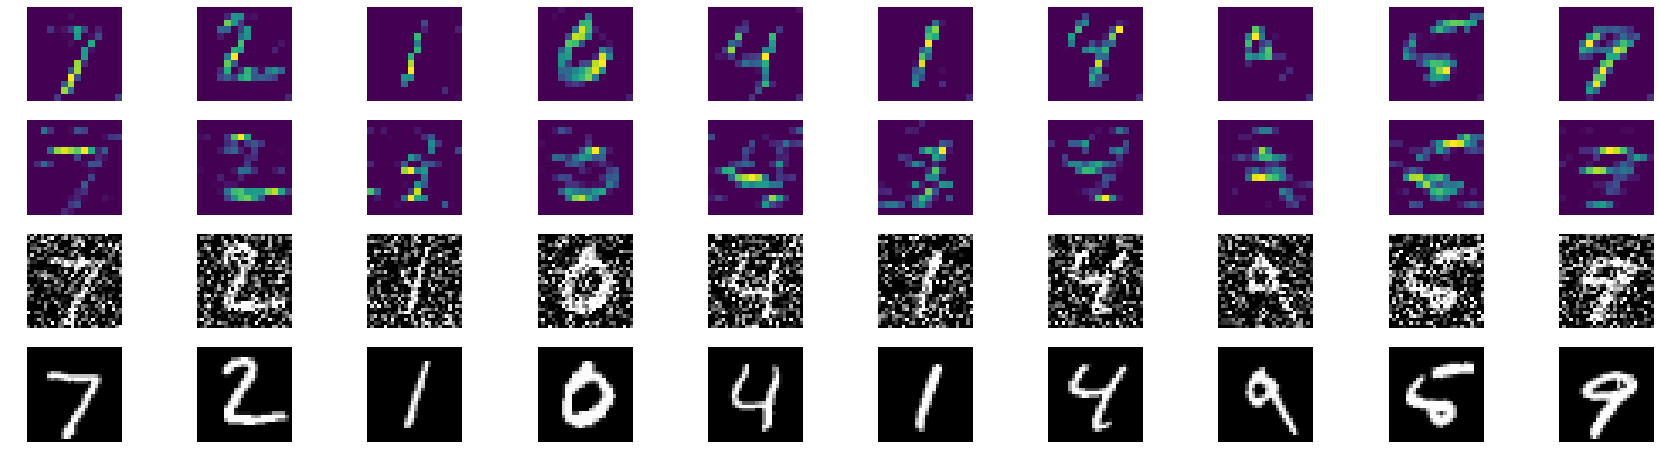

In [27]:
#提取特征表征向量
from keras import backend as k
getCode=k.function([autoencoder.layers[0].input],
                  [autoencoder.layers[3].output])
code=getCode([X_test_noise])[0]
print(code[0].shape)
plt.figure(figsize=(30,8))
for i in range(10):
    plt.subplot(4,10,i+1)
    plt.imshow(code[i][:,:,0])
    plt.axis('off')
    
    plt.subplot(4,10,i+1+10)
    plt.imshow(code[i][:,:,1])
    plt.axis('off')
    
    plt.subplot(4,10,i+1+10*2)
    plt.imshow(X_test_noise[i].reshape(28,28),cmap='gray')
    plt.axis('off')
    
    plt.subplot(4,10,i+1+10*3)
    plt.imshow(X_test[i].reshape(28,28),cmap='gray')
    plt.axis('off')
